<a href="https://colab.research.google.com/github/annykay/NoiseInDataImpact/blob/main/RandomChangeNoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Change Noise

In [1]:
# Imports

import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import f1_score
import pickle
warnings.filterwarnings("ignore")

In [33]:
X_=[]
y_=[]

In [34]:
# Loading example preproceed dataset

X = pd.read_csv('bank_data_features.csv')
y = pd.read_csv('bank_data_labels.csv')
X_.append(X.reset_index(drop=True))
y_.append(y.reset_index(drop=True))

In [36]:
# Random noise applied to all columns
# using .astype(int) allows to easy apply it to categorical variables  and also reduse computational cost

def corrupt_data(X, percent):
    for column in X.columns:
        rand_vect=(np.random.random(size = np.size(X[column]))<percent)
        rand_v=pd.DataFrame(rand_vect*1)[0]
        rand_v_inv = pd.DataFrame(np.invert(rand_vect)*1)[0]
        X_corr = X 
        X_corr[column] = rand_v_inv*X[column] + rand_v*pd.DataFrame(np.random.uniform(min(X[column]), max(X[column]), size = np.size(X[column])).astype(int), columns=[column])[column] 
    return X_corr

In [37]:
# Models

dtc = DecisionTreeClassifier(max_depth=4)
rfc = RandomForestClassifier(n_estimators=5)
xgb = XGBClassifier()
knc = KNeighborsClassifier()
lr = LogisticRegression()

In [38]:
# Models names

titles = [
          'DTC',
          'RFC',
          'KNN',
          'XGB',
          'LRC'
]

In [39]:
# Data noising simulations

train_acc_bank = [[],[],[],[],[]]
test_acc_bank = [[],[],[],[],[]]

for percent in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    clfs = [
    DecisionTreeClassifier(max_depth = 10),
    RandomForestClassifier(max_depth = 10),
    XGBClassifier(max_depth = 10),
    KNeighborsClassifier(n_neighbors = 3, algorithm = 'brute', n_jobs = -1),
    LogisticRegression(C=1)
    ]
        
    X_corr = corrupt_data(X, percent)
    X_train, X_test, y_train, y_test = train_test_split(X_corr, y, test_size=0.2, random_state=0)

    for title, clf, tr_acc, te_acc in zip(titles, clfs, train_acc_bank, test_acc_bank):
        clf.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        tr_acc.append(round(f1_score(y_train, y_train_pred, average='micro'), 4))
        te_acc.append(round(f1_score(y_test, y_test_pred, average='micro'), 4))
        print(title)

DTC
RFC
KNN
XGB
LRC
DTC
RFC
KNN
XGB
LRC
DTC
RFC
KNN
XGB
LRC
DTC
RFC
KNN
XGB
LRC
DTC
RFC
KNN
XGB
LRC
DTC
RFC
KNN
XGB
LRC
DTC
RFC
KNN
XGB
LRC


Text(0.5, 1.0, 'Bank Classification, all features')

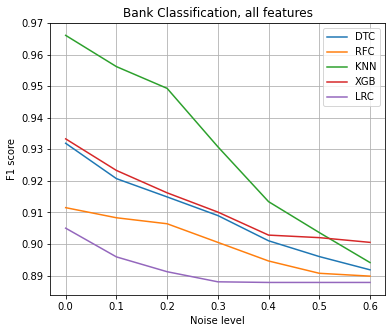

In [40]:
# Plotting results

plt.figure(figsize=(6,5))
for acc, title in zip(train_acc_bank[0:5], titles):
    plt.plot([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],acc, label = title)
plt.legend()
plt.xlabel('Noise level')
plt.ylabel('F1 score')
plt.grid()
plt.title('Bank Classification, all features')


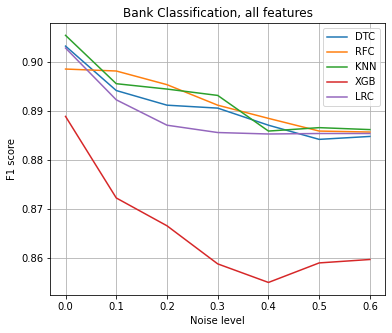

In [41]:
plt.figure(figsize=(6,5))
for acc, title in zip(test_acc_bank[0:5], titles):
    plt.plot([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],acc, label = title)
plt.legend()
plt.xlabel('Noise level')
plt.ylabel('F1 score')
plt.grid()
plt.title('Bank Classification, all features')
plt.show()